**BUSINESS PROBLEM** -
                      Any automobile   product/vehicle   comes to  market after successfully completing   various  tests for safety purposes and some standards which are set by WHO road safety measure . if product/vehicle  fulfill given standards then automobile companies are able to launch their to customers. Mercedes is one of the premium car making company which build cars as per class A-B-C-S and custom made cars as per customer requirement , so all those cars first  goes to testing phase  if they pass guidelines & standard then cars deliver to customers , Mercedes has a lot of features to test so it takes a lot of time to test . As we know testing is a time & cost consuming process .Nowadays companies like Mercedes are shifting towards automation testing which is more efficient than manual testing.as Mercedes shifting toward automation error  due to human intervention/behaviour reducing rapidly .
So, in given problem we have to build a model  which predicts the accurate time of the car spent on the testing system with the help of thousands of cars data with various features regarding cars. The model will help to build an efficient automation system. & as the automation system gets efficient time on the test system reduces such that cars CO2 emission reduces to.


We have a total of 376 variables, each variable is unique features of cars . Mercedes have Class A-B-C-S type cars with different  unique features for each class too. in given problem we have 376 features  most of them are binary feature 0&1 which give us initiation as  if given feature present in test time we get 1 as values else 0

**Business constraint**-

1.predict accurate time car spend on testing system 

2.No latency restriction we can predict in 1 to 2 minutes


**Evaluation metric**-
              in competition they already provide evaluation metrics  R2 score(coefficient of determination) R2 score gives percentage of Y(target variable) lie within the regression line.
R2 is ratio of residual sum of square to sum of square of sum of square of perpendicular distance between data point and avg line
R2 score have upper bond as 1 so easy to use rather than MAE which lie in between 0 to infinity
R2 score is sensitive to outliers if we use linear models , if we use ensemble method like  boosting , Tree base approach R2 score gives robust results.
We can also use MAE (mean absolute error ) it is difference between target value and predicted values , it is robust to outliers and does not penalize the error.
We can also use adjusted R2 - it gives the same intuition as r2 but some time r2 score keep increasing but model is not improving so this can misjudge . adjusted r2 only increase if model is improving.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor

Mercedes-Benz Greener Manufacturing

In [ ]:
# !unzip "/content/drive/MyDrive/Case_study mercedes_Manufacturing/train.csv.zip" -d "/content/drive/MyDrive/Case_study mercedes_Manufacturing/"
# !unzip "/content/drive/MyDrive/Case_study mercedes_Manufacturing/test.csv.zip" -d "/content/drive/MyDrive/Case_study mercedes_Manufacturing/"

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Case_study mercedes_Manufacturing/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Case_study mercedes_Manufacturing/test.csv")
sample_submission=pd.read_csv("/content/drive/MyDrive/Case_study mercedes_Manufacturing/sample_submission.csv.zip")

In [ ]:
print(f"dataset contain {train.shape[0]} no of data point in train and {train.shape[1]} no of features")

dataset contain 4209 no of data point in train and 378 no of features


In [ ]:
print(f"dataset contain  {test.shape[0]} no of datapoint in test")

dataset contain  4209 no of datapoint in test


In [ ]:
train.dropna().shape

(4209, 378)

In [ ]:
display(train.head(5) , test.head(5) )

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
cat_features=list(train.select_dtypes(include='object').columns)
print(f"train data contain {len(cat_features )} no. of categorical features")

train data contain 8 no. of categorical features


In [ ]:
cat_features_test=list(test.select_dtypes(include='object').columns)
print(f"test data contain {len(cat_features_test)} no. of categorical features")

test data contain 8 no. of categorical features


In [ ]:
binary_features=list(train.select_dtypes(include='int64').columns)
print(f"train data contain {len(binary_features)} no. of binary features")

train data contain 369 no. of binary features


In [ ]:
binary_features_test=list(train.select_dtypes(include='int64').columns)
print(f"test data contain {len(binary_features_test)} no. of binary features")

test data contain 369 no. of binary features


# ***Target feature Y***

In [ ]:
display(train["y"].describe())

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

target values lie betrween 72 to 265

75% od data  lie between 72 to 100

In [ ]:
var=train.loc[:,"y"].var()

In [ ]:
print(f"target variable have  {round(var , 2)}  variance in data so data is fairly spread")

target variable have  160.77  variance in data so data is fairly spread


In [ ]:
print("target variable  skewness scoore is" , round(skew(train["y"]) , 2) , "which means target variable have high skewness towards right" )

target variable  skewness scoore is 1.21 which means target variable have high skewness towards right


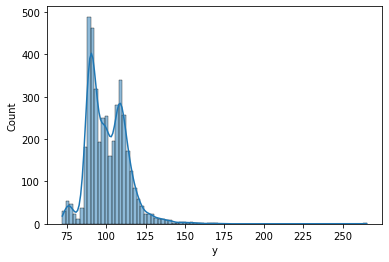

In [ ]:
sns.histplot(data=train, x="y" , kde=True)

from given histrogram i understand that target variable have high variance in data 

target variable is not gausian normal 

target variable have right skewness 

i can visualize that  , their are very few point above 150 (i think  that datapoint above 150 mainly belong to premium car model because , premium model  have more features than normal car so its  also take more time on testing system)




as we know sometimes after applying log-transformation we can convert distribution to normal so i am going to apply it on target variable

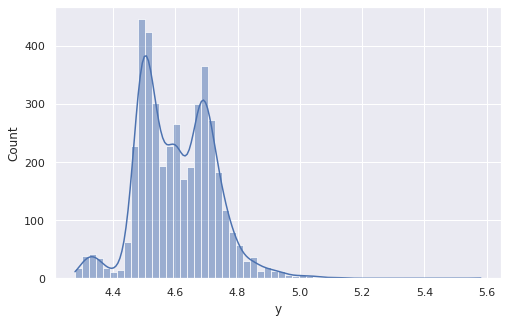

In [ ]:
y_log=np.log(train["y"])
sns.set(rc={'figure.figsize':(8,5)})
display(sns.histplot(data=y_log , kde=True))

after log-transformation i dont see any changes in target variable . 

target var dont look like gausian normal so i will not use log-transformation

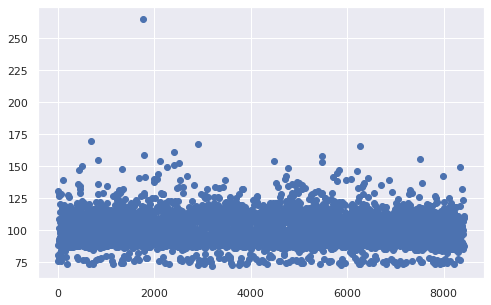

In [ ]:
plt.scatter(train["ID"] ,train["y"] )

from histogram and scatter plot i visualize that their are some outliers in data 

with the help of scatter plot and histogram i understand that data contain  outiers in it so i will check percentile values.

 I am going to find out  where we have extram outliers in data

In [ ]:
for i in range(0  , 110, 10):
  print(i , "th percentile value is =" ,  round(np.percentile(train["y"] , i)))

0 th percentile value is = 72
10 th percentile value is = 88
20 th percentile value is = 90
30 th percentile value is = 92
40 th percentile value is = 95
50 th percentile value is = 99
60 th percentile value is = 104
70 th percentile value is = 108
80 th percentile value is = 111
90 th percentile value is = 115
100 th percentile value is = 265


as i see data contain extrem point in between 90 - 100 percentile , so lets zoom it

In [ ]:
for i in range(90  , 101, 1):
  print(i , " th percentile value is =" ,  round(np.percentile(train["y"] , i)))

90  th percentile value is = 115
91  th percentile value is = 116
92  th percentile value is = 117
93  th percentile value is = 118
94  th percentile value is = 119
95  th percentile value is = 121
96  th percentile value is = 122
97  th percentile value is = 126
98  th percentile value is = 129
99  th percentile value is = 137
100  th percentile value is = 265


still i have significant values in range 90-99 . 

it look like i have extrem points in between 99-100

In [ ]:
for i in np.linspace(99,100,11):
  print(i , "th percentile value is =" ,  round(np.percentile(train["y"] , i)))

99.0 th percentile value is = 137
99.1 th percentile value is = 139
99.2 th percentile value is = 140
99.3 th percentile value is = 141
99.4 th percentile value is = 143
99.5 th percentile value is = 146
99.6 th percentile value is = 149
99.7 th percentile value is = 151
99.8 th percentile value is = 155
99.9 th percentile value is = 160
100.0 th percentile value is = 265


now i can properly see , i have extrem outliers in between 99.7 to 100 
so i am going to  set threshold to 151 

i can remove values above  thershold .

we have to remove extrem outliers because as we have R2 score as evaluation score which is sensitive to outilers

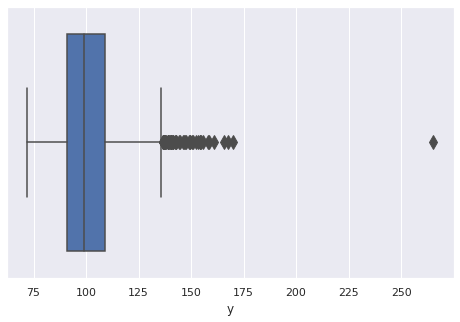

In [ ]:
ax = sns.boxplot(x="y", data=train , fliersize=10 , saturation=0.90)

box plot also indicating taret variable have outliers point above maximum quartile range.

I will make new df with clean target variable

In [ ]:
train_new=train[train['y'] < 160]
train_new.shape

(4204, 378)

# ***univariate analysis on binary features***

In [ ]:
train_cat_feature=train[list(train.select_dtypes(include='object').columns)]
train_cat_feature.head(5)

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


# feature X0

These five core models are A, B, C, E, and S. Mercedes-Benz uses these core models internationally, therefore some letters do not apply to the United States market. Many of these core models apply to the United States market, such as C being the C-Class sedan, C-Class Coupe, and C-Class Cabriolet.

In [ ]:
feature_x0=pd.DataFrame(train[["X0"  ,"y"]])

In [ ]:
feature_x0.head(2)

,X0,y
0,k,130.81
1,k,88.53


In [ ]:
feature_x0.shape

(4209, 2)

In [ ]:
feature_x0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      4209 non-null   object 
 1   y       4209 non-null   float64
dtypes: float64(1), object(1)
memory usage: 65.9+ KB


feature X0 dont have any null values 

In [ ]:
feature_x0.describe(include='all')

,X0,y
count,4209,4209.000000
unique,47,NaN
top,z,NaN
freq,360,NaN
mean,NaN,100.669318
std,NaN,12.679381
min,NaN,72.110000
25%,NaN,90.820000
50%,NaN,99.150000
75%,NaN,109.010000


we have 47 unique categories in feature X0

In [ ]:
feature_x0.isnull().sum()

X0    0
y     0
dtype: int64

no null values

In [ ]:
feature_x0["X0"].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

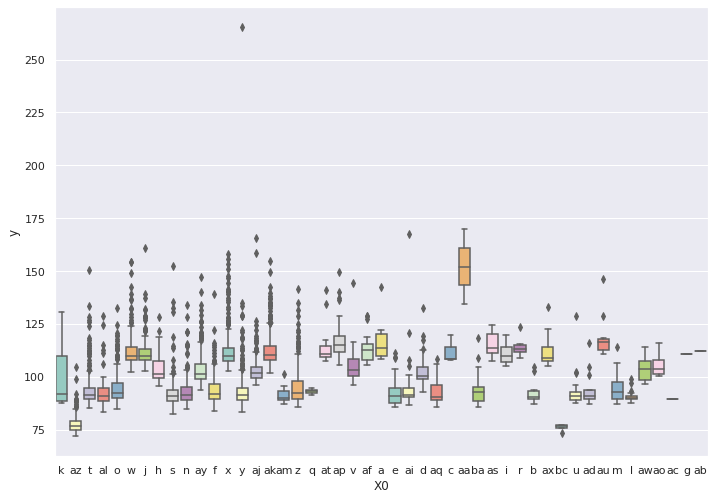

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")
ax = sns.boxplot(x="X0", y="y",  data=feature_x0, palette="Set3")

with the help of box-plot we can visualize that feature X0 have high varaiance / more information which wil be helpfull to predict target variable

as i see categories az , al , w , j , h  , s  , z have high variance 

features ac , g , ab look like constant 

In [ ]:
len(test["X0"].unique()) , len(train["X0"].unique())

(49, 47)

In [ ]:
test["X0"].unique()

array(['az', 't', 'w', 'y', 'x', 'f', 'ap', 'o', 'ay', 'al', 'h', 'z',
       'aj', 'd', 'v', 'ak', 'ba', 'n', 'j', 's', 'af', 'ax', 'at', 'aq',
       'av', 'm', 'k', 'a', 'e', 'ai', 'i', 'ag', 'b', 'am', 'aw', 'as',
       'r', 'ao', 'u', 'l', 'c', 'ad', 'au', 'bc', 'g', 'an', 'ae', 'p',
       'bb'], dtype=object)

In [ ]:
train["X0"].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [ ]:
for i in test["X0"].unique():
  if i not in train["X0"].unique():
    print(f"category {i} is not present in train data")

category av is not present in train data
category ag is not present in train data
category an is not present in train data
category ae is not present in train data
category p is not present in train data
category bb is not present in train data


In [ ]:
for i in train["X0"].unique():
  if i not in test["X0"].unique():
    print(f"category {i} is not present in train data")

category q is not present in train data
category aa is not present in train data
category ac is not present in train data
category ab is not present in train data


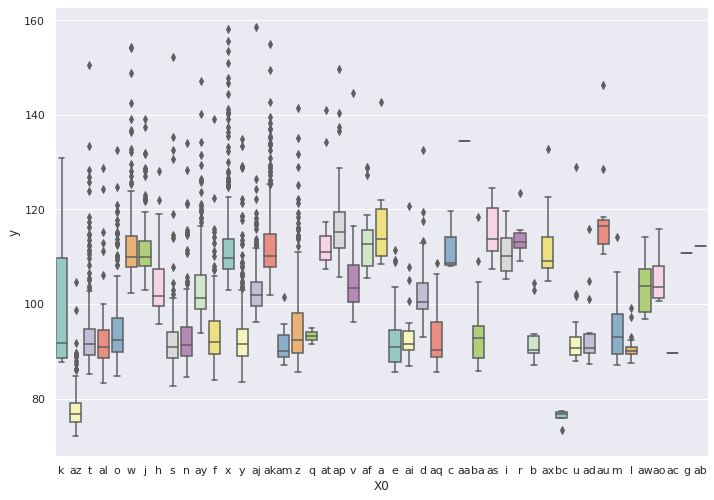

In [ ]:
ax = sns.boxplot(x="X0", y="y",  data=train_new, palette="Set3")

in above box-plot i use df which contain clean target_var.

now i can visualize data properly , from category k to a all those category have good varance

categories from e to ab have low variance / sparse in nature

I visualise both box plots. I noticed that category A A have some variance if we use original data but when  I remove outliers from data and then I visualise  boxplot with  clean data I am getting constant as a output which mean category A A don't have any  variance  in it so I can't just remove outliers from Data because some information are in those outliers

'aa' is category which belong to premium car only because all catrgories having 'aa' have target var above 150 so it take more time on test system 





# feature X1

In [ ]:
train["X1"].unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [ ]:
print("feature X1 have" , len(train["X1"].unique()) , "unique category")

feature X1 have 27 unique category


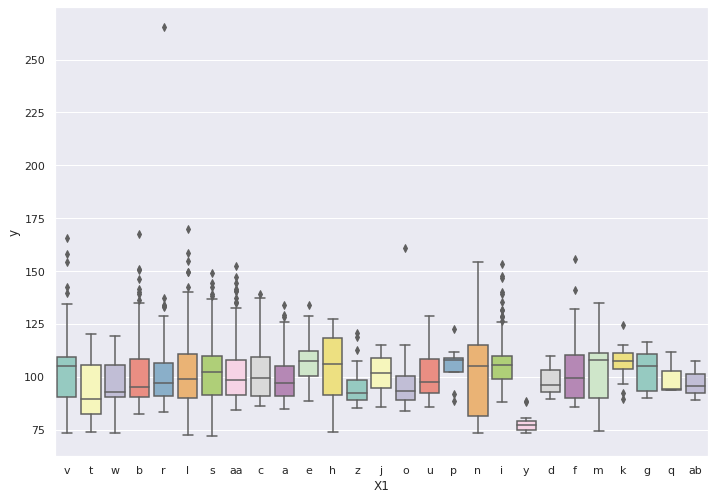

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")
ax = sns.boxplot(x="X1", y="y",              
data=train,  palette="Set3")

as i visualize box-plot , feature have high variance / information which help to predict target variable

but i notice that some categories contain outliers in it as i set threshold of 150 to 160 . outliers are impacting some categories v , b , r , i 

In [ ]:
for i in test["X1"].unique():
  if i not in train["X1"].unique():
    print(f"category {i} is not present in train:")

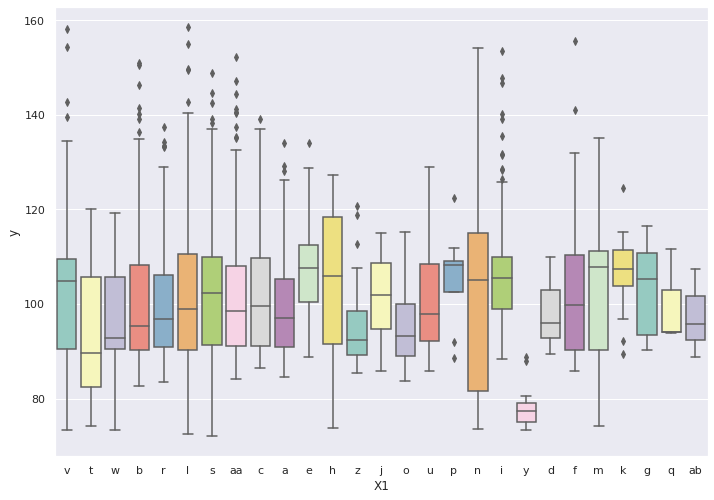

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")
ax = sns.boxplot(x="X1", y="y", data=train_new,  palette="Set3")

i dont see much change after removing outilers just it impack category "r"

given category "r" , it takes more time on testing system

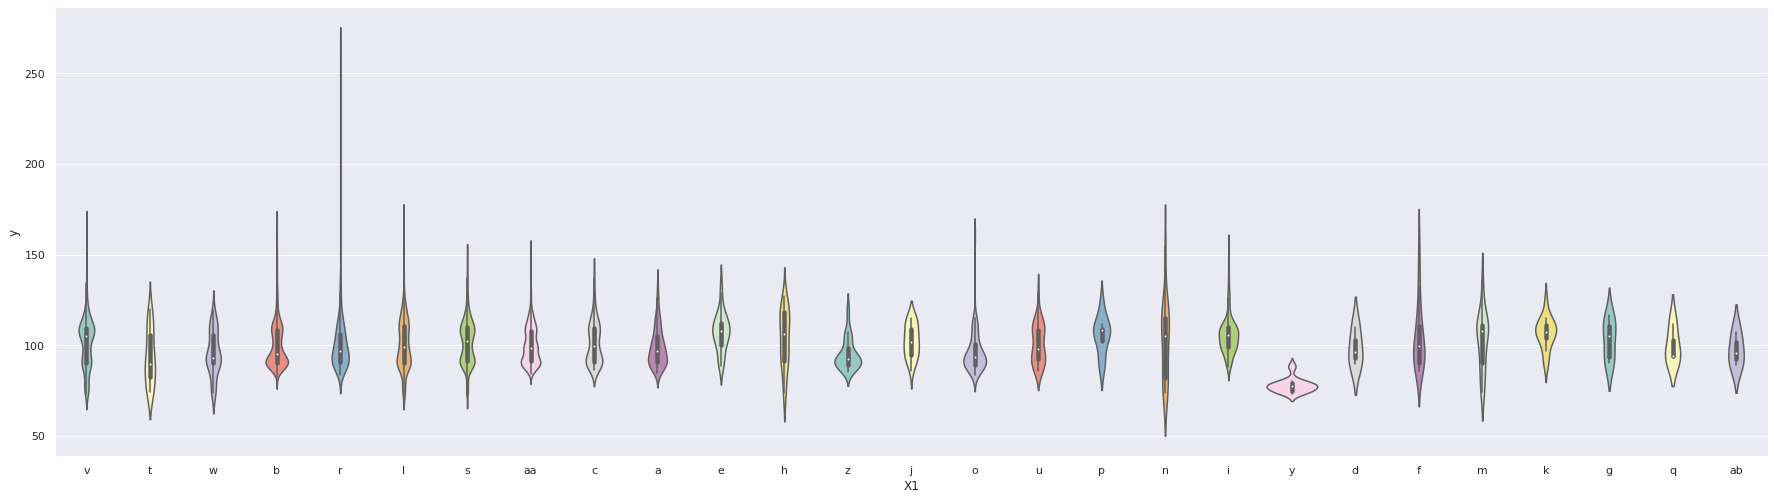

In [ ]:
sns.set(rc={'figure.figsize':(30.7,8.27)})
sns.set_style("darkgrid")
ax = sns.violinplot(x="X1", y="y",  data=train,  palette="Set3")

voilin plot help me to understand how PDF of given categories behaviour like 

violinplot is not clearly visualize but it give me some intitution about how given categories working .

1. categories  [v  , b , r ,f] are right skewed it means ,if we have categories like [v , b , r , f] then it take more time in testing system range between (72 to 150)

2. if we have categories m , k , g , q , ab it take minimum time in testing system range (72 to 110 or 120)


# feature X2 

In [ ]:
feature_x2=pd.DataFrame(train[["X2"  ,"y"]])

In [ ]:
for i in test["X2"].unique():
  if i not in train["X2"].unique():
    print(f"category {i} is not present in train:")

category aj is not present in train:
category ax is not present in train:
category ab is not present in train:
category w is not present in train:
category ad is not present in train:
category u is not present in train:


In [ ]:
print("feature X2 have" , len(train["X2"].unique()) , "unique category")

feature X2 have 44 unique category


In [ ]:
f_X2=pd.DataFrame(train.groupby(['X2']).size().reset_index(name='counts'))

In [ ]:
f_X2.head(2)

,X2,counts
0,a,47
1,aa,1


<BarContainer object of 44 artists>

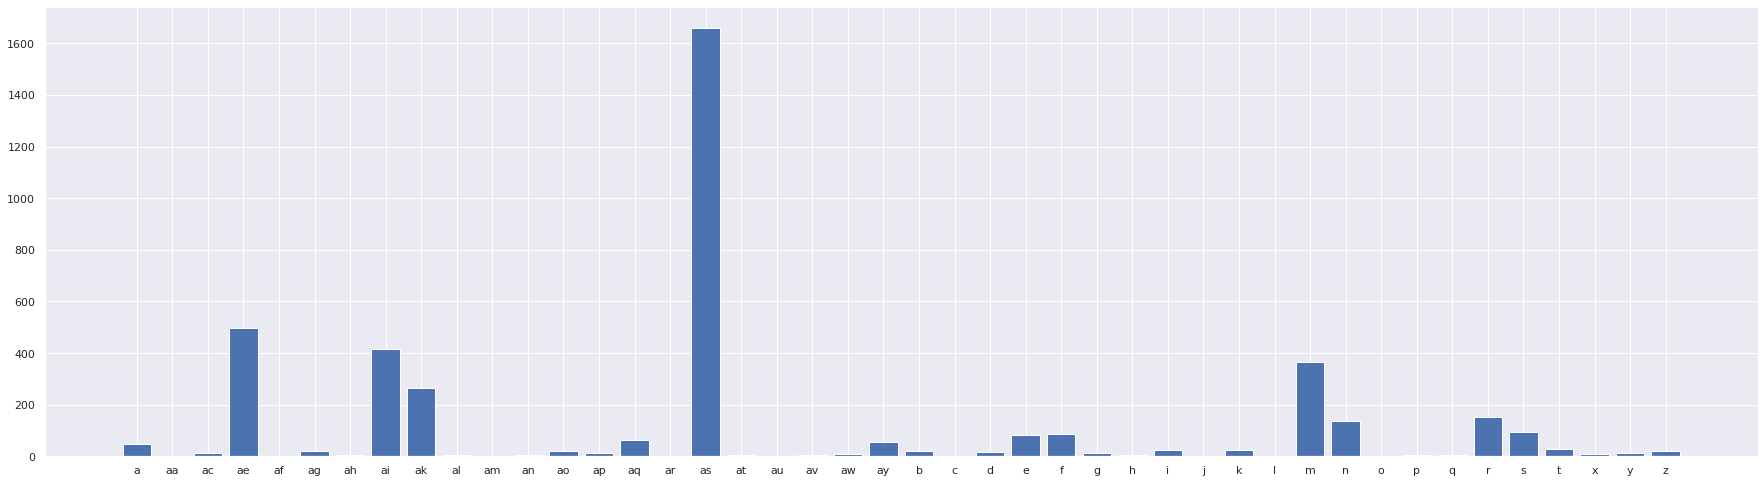

In [ ]:
plt.bar(f_X2["X2"] , f_X2["counts"])

category "as"  have max data point counts 1649 and categories [o . I , af , aa] have single data point counts so they act like constant

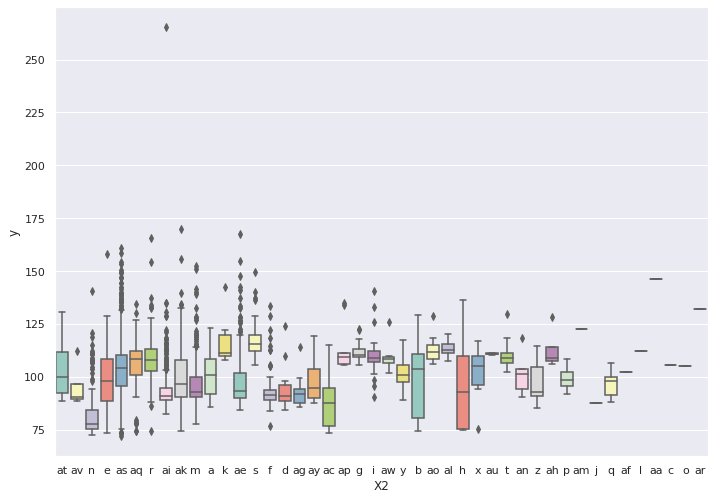

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")
ax = sns.boxplot(x="X2", y="y",              
data=train,  palette="Set3")

feature X2 also have good variance in data but  categories like [ am , j , i ,aa, c, o , ar] have constant values which mean they just have single data point as labeled

category "as"  have max data point counts 1649 so it also have high variance  and categories [o . I , af , aa] have single data point counts so they act like constant

# Feature 3 ,4 , 5

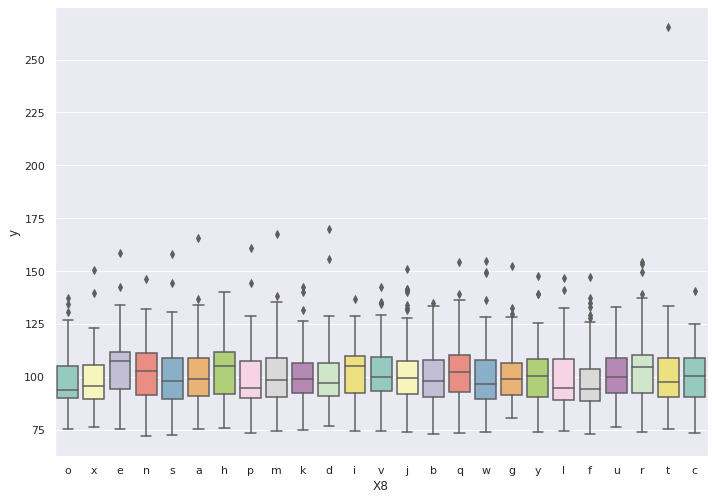

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")
ax = sns.boxplot(x="X8", y="y",              
data=train,  palette="Set3")

In [ ]:
for i in test["X3"].unique():
  if i not in train["X3"].unique():
    print(f"category {i} is not present in train:")

In [ ]:
for i in test["X4"].unique():
  if i not in train["X4"].unique():
    print(f"category {i} is not present in train:")

In [ ]:
for i in test["X5"].unique():
  if i not in train["X5"].unique():
    print(f"category {i} is not present in train:")

category t is not present in train:
category b is not present in train:
category a is not present in train:
category z is not present in train:


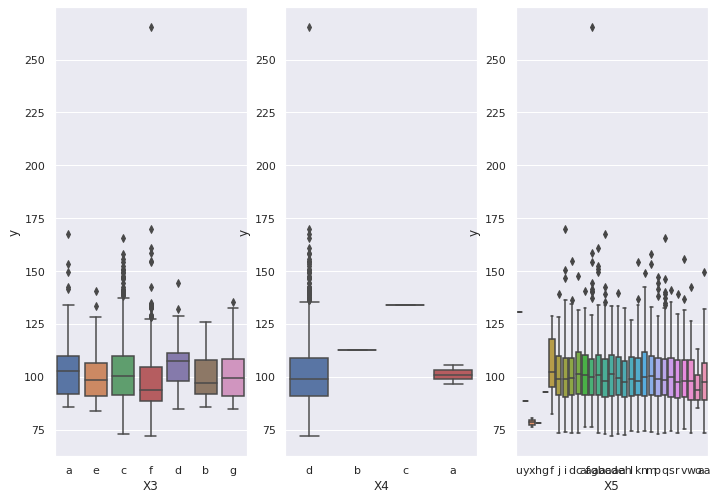

<Figure size 1440x1440 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1, 3)
plt.figure(figsize=(20,20))
ax = sns.boxplot(x="X3", y="y", data=train, orient='v',  ax=axes[0])
ax = sns.boxplot(x="X4", y="y", data=train, orient='v', ax=axes[1])
ax = sns.boxplot(x="X5", y="y", data=train, orient='v', ax=axes[2])

feature X3 and X5 have varaince in data so it will be helpfull to predict target variable

in X5 we have some constant categories [u , y , x, h ] it means given categories have 1 or 2 data point label as given category

X4 dont have much variance so we can just remove it from data 

# feature 6 , 8

In [ ]:
for i in test["X6"].unique():
  if i not in train["X6"].unique():
    print(f"category {i} is not present in train:")

In [ ]:
for i in test["X8"].unique():
  if i not in train["X8"].unique():
    print(f"category {i} is not present in train:")

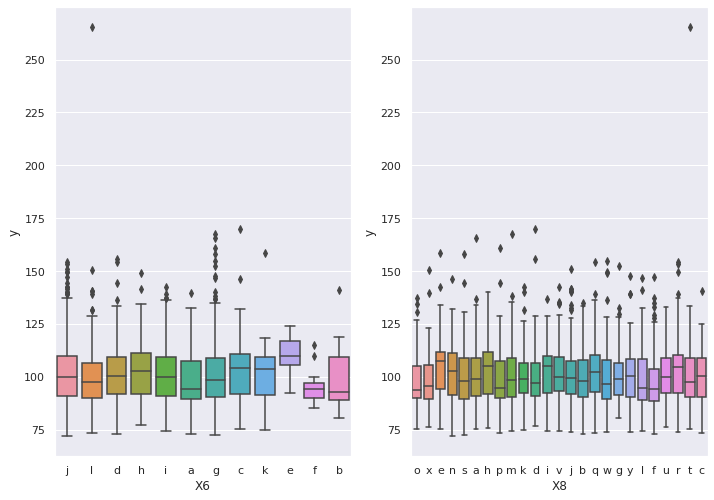

<Figure size 1440x1440 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(20,20))
ax = sns.boxplot(x="X6", y="y", data=train, orient='v',  ax=axes[0])
ax = sns.boxplot(x="X8", y="y", data=train, orient='v', ax=axes[1])

both feature have good variance so both features we can use for modeling , not any sparse/constant category 

# **overall analysis of categorical features**

I go through all the categorical features. Understand that feature X0 ,X1 ,X2 ,X3 ,X5 ,X6 , X7 ,X8 have good variance in data which will help to build robust model

Feature X4 do not have variance/don't have information in it. I am going to remove X4 from data


I also notice that some categories in  features occur only if target variable is greater than 160 so so we can say that some categories are special to  the cars which get high time on testing system.
As we have very less data point above 160 target variable.

very few  custom made cars which have more  features/ unique (category) which just belong to them . so while building model we cant just remove categories which have low varaiance

i also remove outiers / extrem point from target varaible but its not helpful beacuse it impact on some categories  in features

# **binary features**


In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Case_study mercedes_Manufacturing/train.csv")

In [ ]:
train.dropna(axis='columns')

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
binary_features=list(train.select_dtypes(include='int64').columns)
train[binary_features].head(5)

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


as we have alot of binary features , we cant visualize them so first i will select top feature which contribute to predict target variable  

In [ ]:
binary_features=list(train.select_dtypes(include='int64').columns)
print(f"data contain total {len(binary_features)} no. of binary features")

data contain total 369 no. of binary features


In [ ]:
binary_features_X=train[binary_features]
y=train["y"]

In [ ]:
features_10=SelectKBest(score_func=f_classif  , k=10)
features_10.fit(binary_features_X , y)
top_10_features=features_10.transform(binary_features_X)

i am using f_classif = ANOVA F-value to extarct top 10 features 

In [ ]:
print("i got top 10 binary features which have high annova score " , list(binary_features_X.columns[features_10.get_support()]))

i got top 10 binary features which have high annova score  ['X205', 'X236', 'X252', 'X260', 'X270', 'X319', 'X332', 'X339', 'X372', 'X384']


In [ ]:
features_top_10=train[binary_features_X.columns[features_10.get_support()]]
features_top_10["y"]=train["y"]

In [ ]:
features_top_10.head()

,X205,X236,X252,X260,X270,X319,X332,X339,X372,X384,y
0,0,0,0,0,0,0,0,0,0,0,130.81
1,1,0,0,0,0,0,0,0,0,0,88.53
2,1,0,1,0,0,0,0,0,0,0,76.26
3,1,0,1,0,0,0,0,0,1,0,80.62
4,1,0,1,0,0,0,0,0,0,0,78.02


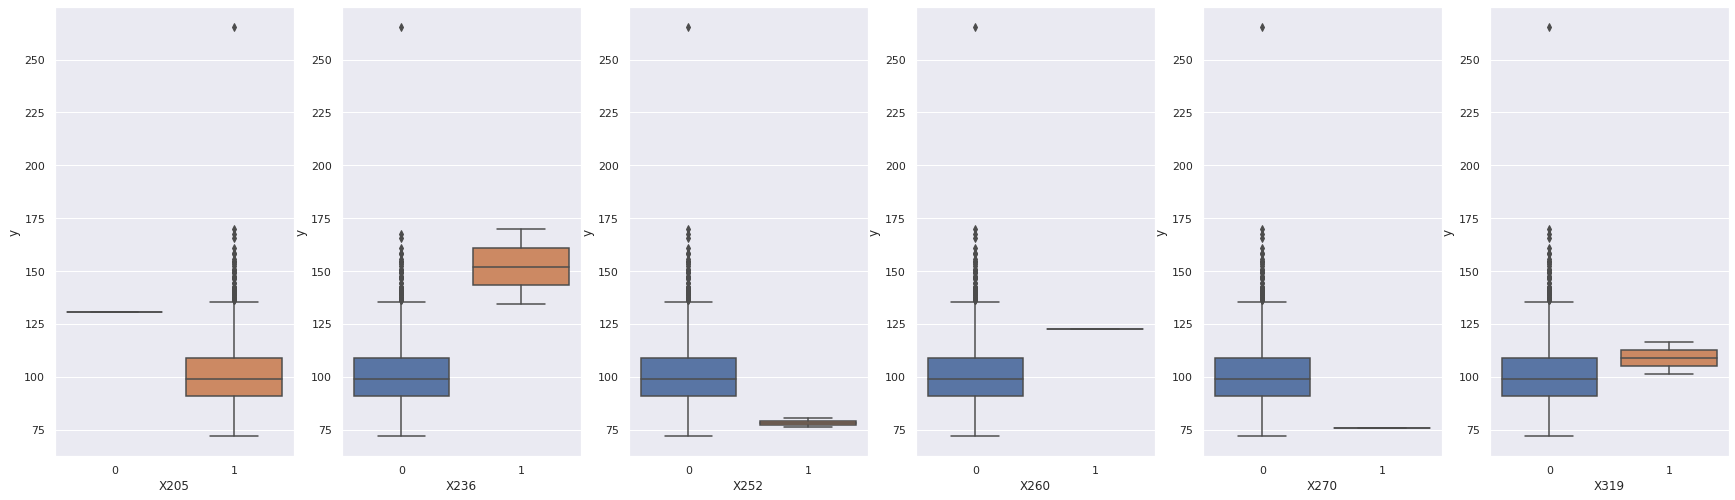

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.set(rc={'figure.figsize':(30,8.27)})
fig, axes = plt.subplots(1, 6)
plt.figure(figsize=(20,20))
ax = sns.boxplot(x="X205", y="y", data=features_top_10, orient='v',  ax=axes[0])
ax = sns.boxplot(x="X236", y="y", data=features_top_10, orient='v', ax=axes[1])
ax = sns.boxplot(x="X252", y="y", data=features_top_10, orient='v', ax=axes[2])
ax = sns.boxplot(x="X260", y="y", data=features_top_10, orient='v', ax=axes[3])
ax = sns.boxplot(x="X270", y="y", data=features_top_10, orient='v', ax=axes[4])
ax = sns.boxplot(x="X319", y="y", data=features_top_10, orient='v', ax=axes[5])

i Can properly visualise given box plots.
1. Feature X260 feature X270 and X205 have just "0" for all data points it means given features are constant as we have 0 for all data points. so i am going to remove such features Because it is not useful to predict target variable.
2. feature X252 and feature X260 have same variance in data as we see both have same median , min and max values so we will remove those duplicates also from data

some binary features contain constant/ o varaince. so i am going to remove such values

In [ ]:
filter = VarianceThreshold(threshold=0)
filter.fit(binary_features_X)
train_update = filter.transform(binary_features_X)

In [ ]:
print("total features extracted=" , binary_features_X.columns[filter.get_support()].shape[0])

total features extracted= 357


In [ ]:
filter = VarianceThreshold(threshold=0)
filter.fit(binary_features_X)
train_update = filter.transform(binary_features_X)
##################################################################
filtered_feature=binary_features_X.columns[filter.get_support()]
feature_col=binary_features_X.columns
##################################################################
for i in feature_col:
  if i  not in set(filtered_feature):
    print("removed feature =" ,i)

removed feature = X11
removed feature = X93
removed feature = X107
removed feature = X233
removed feature = X235
removed feature = X268
removed feature = X289
removed feature = X290
removed feature = X293
removed feature = X297
removed feature = X330
removed feature = X347


In [ ]:
binary_filterd_feature=train[filtered_feature]
binary_filterd_feature.head(2)

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


now i am going to remove features which have same variance .

if i remove those featutres model will be perform good because thrn we wil have less features to work with

In [ ]:
best_feature=SelectKBest(score_func=f_classif  , k=357)
best_feature.fit(binary_filterd_feature , y)
top_features=best_feature.transform(binary_filterd_feature)

In [ ]:
binary_feat_columns=binary_filterd_feature.columns
anova_score=best_feature.scores_

In [ ]:
feature_variance= pd.DataFrame({"feature":binary_feat_columns, "variance":anova_score})
feature_variance.head(5) ,feature_variance.shape

(  feature  variance
 0      ID  1.000620
 1     X10  0.785816
 2     X12  1.066355
 3     X13  0.918877
 4     X14  1.169988, (357, 2))

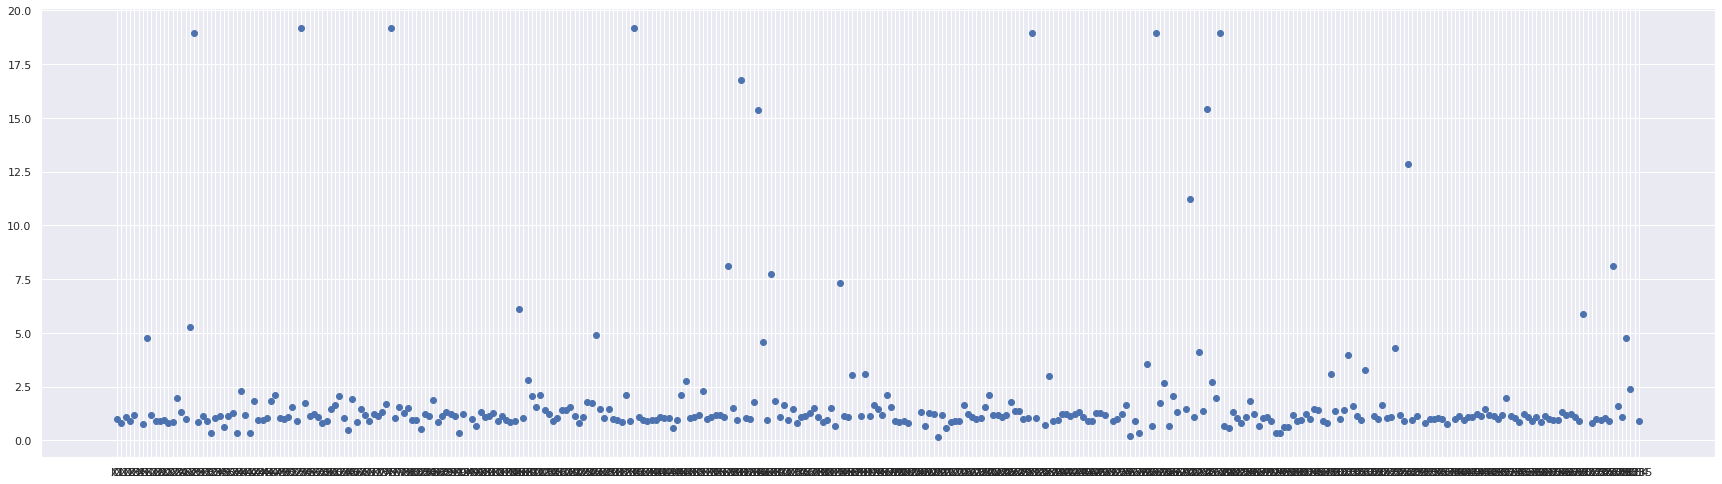

In [ ]:
plt.scatter(feature_variance["feature"] , feature_variance["variance"])

with the help of scatter plot i visualize that lot of features have same variance , so i am going to remove those fetures

most of festures are close to zero varaince

In [ ]:
print("we have total " , len(feature_variance["variance"].unique()) , "no.  of unique binary features with different varaince")

we have total  292 no.  of unique binary features with different varaince


In [ ]:
feature_var_filtered = feature_variance.drop_duplicates('variance', keep='last')

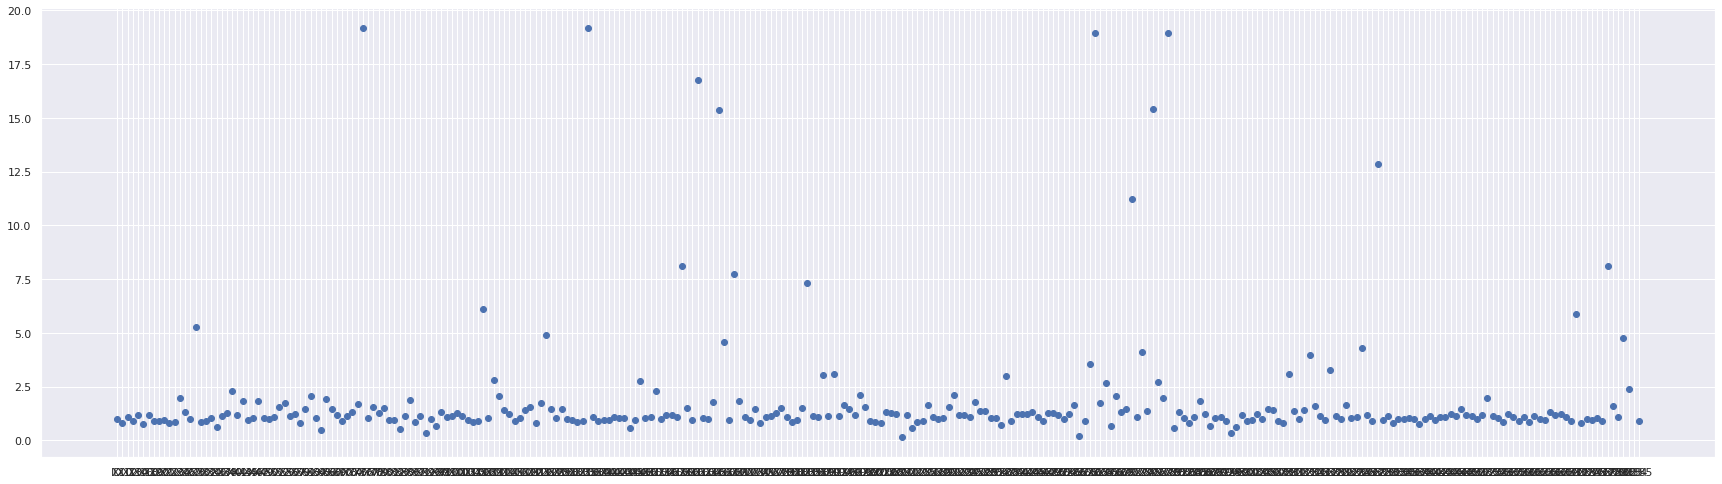

In [ ]:
plt.scatter(feature_var_filtered["feature"] , feature_var_filtered["variance"])

now scatter plot looking clear. i removed all duplicte varaince features

In [ ]:
filterd_feature2=feature_var_filtered["feature"]
binary_filterd_feature2=train[filterd_feature2]

In [ ]:
binary_filterd_feature2.head(2)

,ID,X10,X12,X13,X14,X16,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X30,X32,X34,X36,X37,X38,X40,X41,X43,X45,X46,X47,X49,X50,X51,X52,X55,X56,X57,X59,X61,X63,X64,X65,...,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X365,X366,X367,X368,X369,X370,X371,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


i clean binary features . i removed features which have  same variance and constant values  binary features.

now i am going to visualize top 5 binary features 

In [ ]:
features_10=SelectKBest(score_func=f_classif  , k=10)
features_10.fit(binary_filterd_feature2 , y)
top_10_features=features_10.transform(binary_filterd_feature2)

In [ ]:
features_top_10=train[binary_filterd_feature2.columns[features_10.get_support()]]
features_top_10["y"]=train["y"]

In [ ]:
features_top_10

,X76,X136,X162,X166,X263,X272,X276,X279,X328,X384,y
0,0,1,0,0,1,0,0,0,0,0,130.81
1,0,1,0,0,1,0,0,0,0,0,88.53
2,1,0,1,0,0,1,1,1,1,0,76.26
3,1,0,1,1,0,1,1,1,1,0,80.62
4,1,0,1,1,0,1,1,1,1,0,78.02
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,1,0,0,0,0,0,107.39
4205,0,1,0,0,1,0,0,0,0,0,108.77
4206,0,1,0,0,1,0,0,0,0,0,109.22
4207,0,1,0,0,1,0,0,0,0,0,87.48


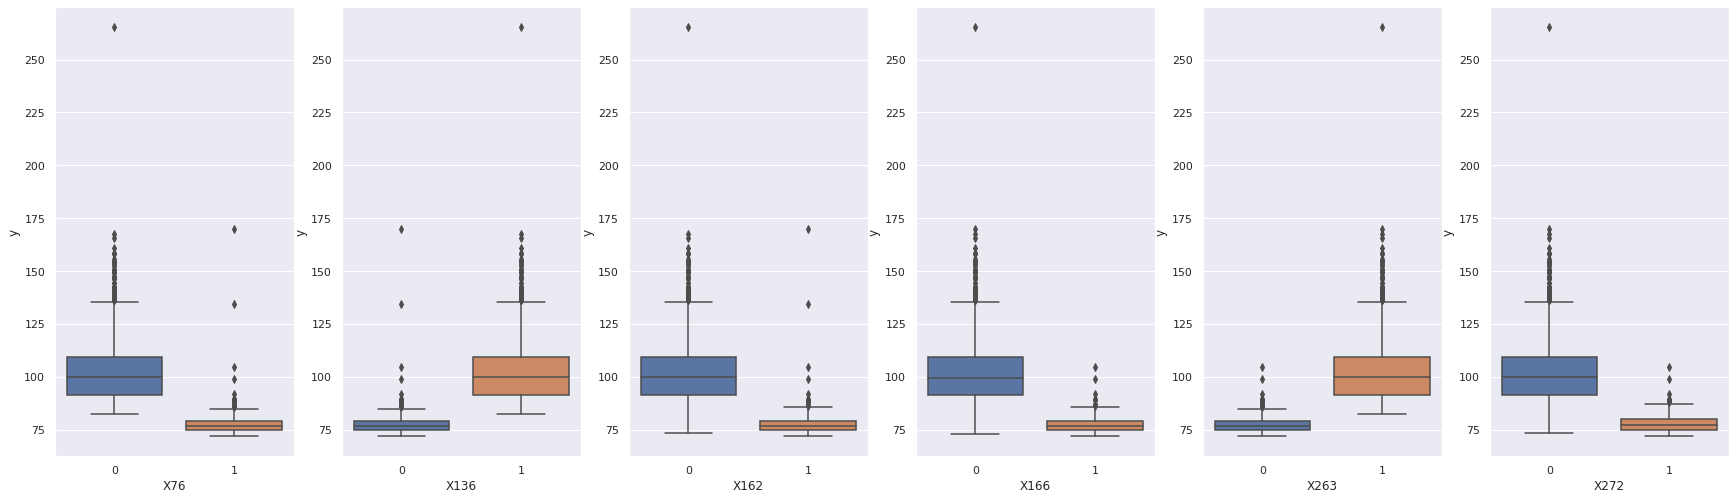

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.set(rc={'figure.figsize':(30,8.27)})
fig, axes = plt.subplots(1, 6)
plt.figure(figsize=(20,20))
ax = sns.boxplot(x="X76", y="y", data=features_top_10, orient='v',  ax=axes[0])
ax = sns.boxplot(x="X136", y="y", data=features_top_10, orient='v', ax=axes[1])
ax = sns.boxplot(x="X162", y="y", data=features_top_10, orient='v', ax=axes[2])
ax = sns.boxplot(x="X166", y="y", data=features_top_10, orient='v', ax=axes[3])
ax = sns.boxplot(x="X263", y="y", data=features_top_10, orient='v', ax=axes[4])
ax = sns.boxplot(x="X272", y="y", data=features_top_10, orient='v', ax=axes[5])

after cleaning all those binary features new top 10 binary featurs giving me  good result . 

all binary features have good varaince , all features have different variance and none of them have just one class values


# visualizing top 20 corr heatmap and removing highly correlelated features

In [ ]:
best_feature=SelectKBest(score_func=f_classif  , k=20)
best_feature.fit(binary_filterd_feature2 , y)
top_features=best_feature.transform(binary_filterd_feature2)

In [ ]:
top_features.shape

(4209, 20)

In [ ]:
top_20_binary_feature=train[binary_filterd_feature2.columns[best_feature.get_support()]]

In [ ]:
top_20_binary_feature.head(5)

,X28,X76,X108,X127,X136,X159,X162,X166,X167,X169,X185,X263,X272,X276,X279,X328,X371,X378,X382,X384
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,0,1,0
3,1,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0
4,1,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,0


https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

https://www.kaggle.com/questions-and-answers/216451

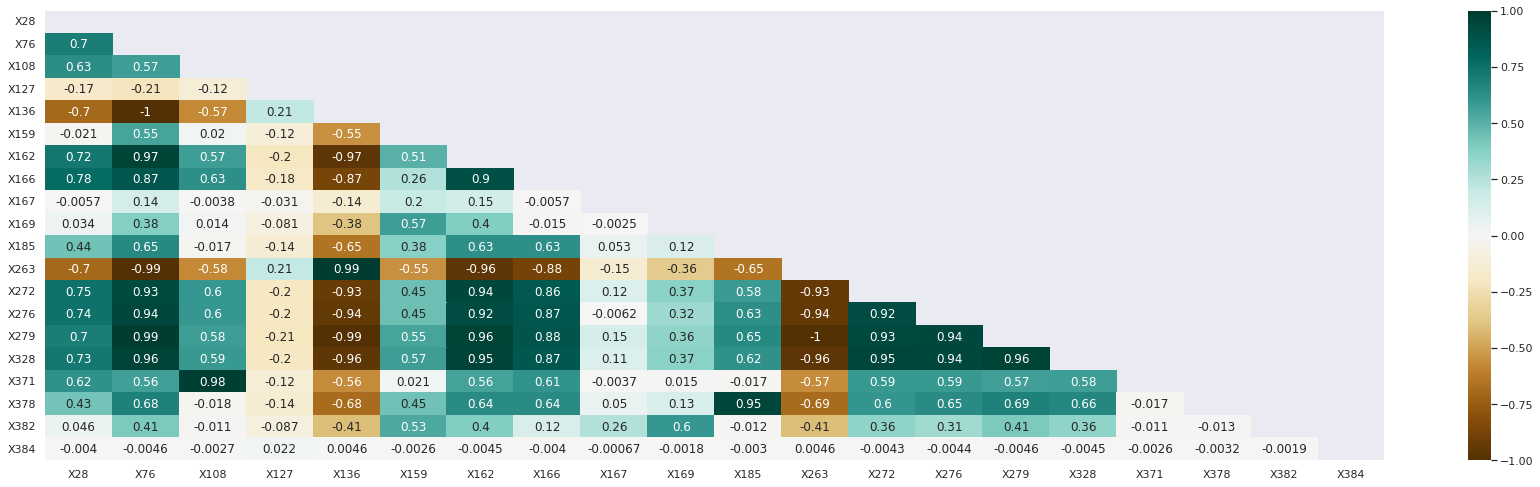

In [ ]:
mask = np.triu(np.ones_like(top_20_binary_feature.corr(), dtype=np.bool))
heatmap = sns.heatmap(top_20_binary_feature.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

their are some features X272 & X162 , X279 & X162 , X328 & X279  , X162 & X76 are highly correlated with each other having corr values of 0.95 to 0.97.
i am going to drop highly correlated features from data.

now i will check corr 1 Vs all features

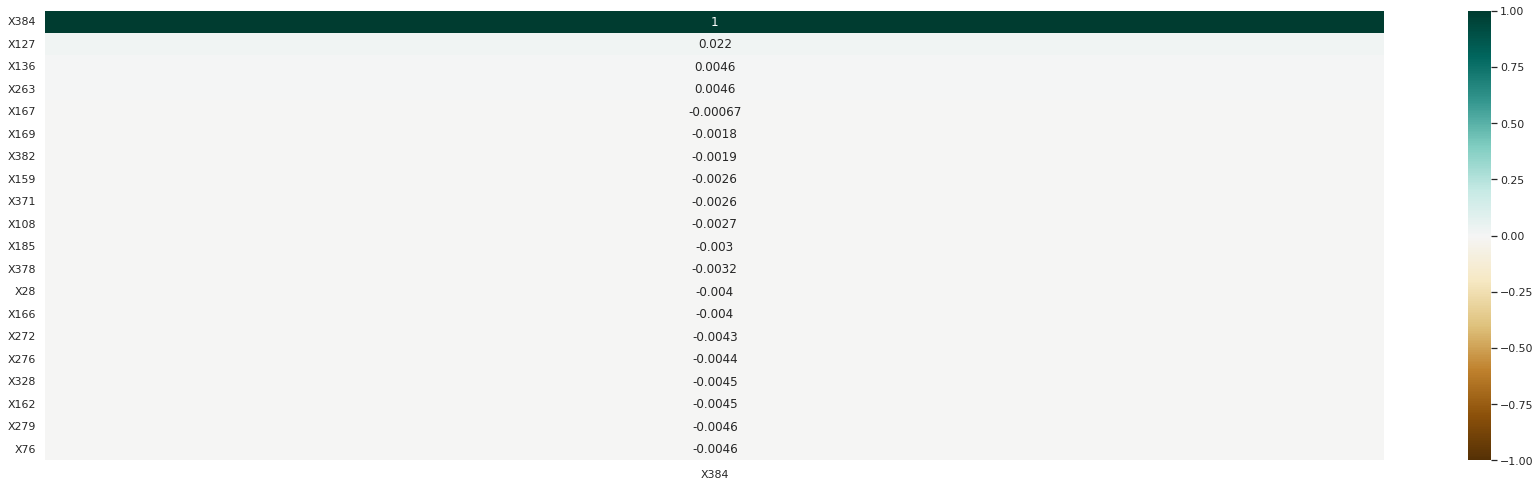

In [ ]:
heatmap = sns.heatmap(top_20_binary_feature.corr()[['X384']].sort_values(by='X384', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

feature X384 have linear realtionship between all top 20 featres so i can use X384 for modeling

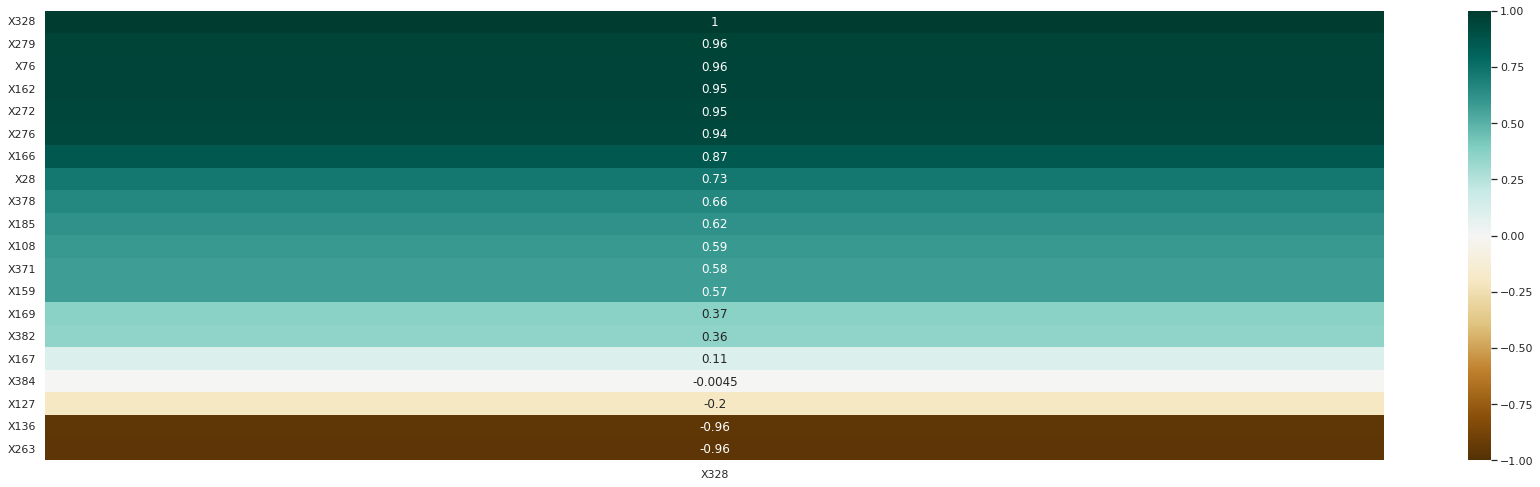

In [ ]:
heatmap = sns.heatmap(top_20_binary_feature.corr()[['X328']].sort_values(by='X328', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

features X328 is correlated with 10+ fertures . so i am going to set threshold <=96 and remove features which is corr above 0.96

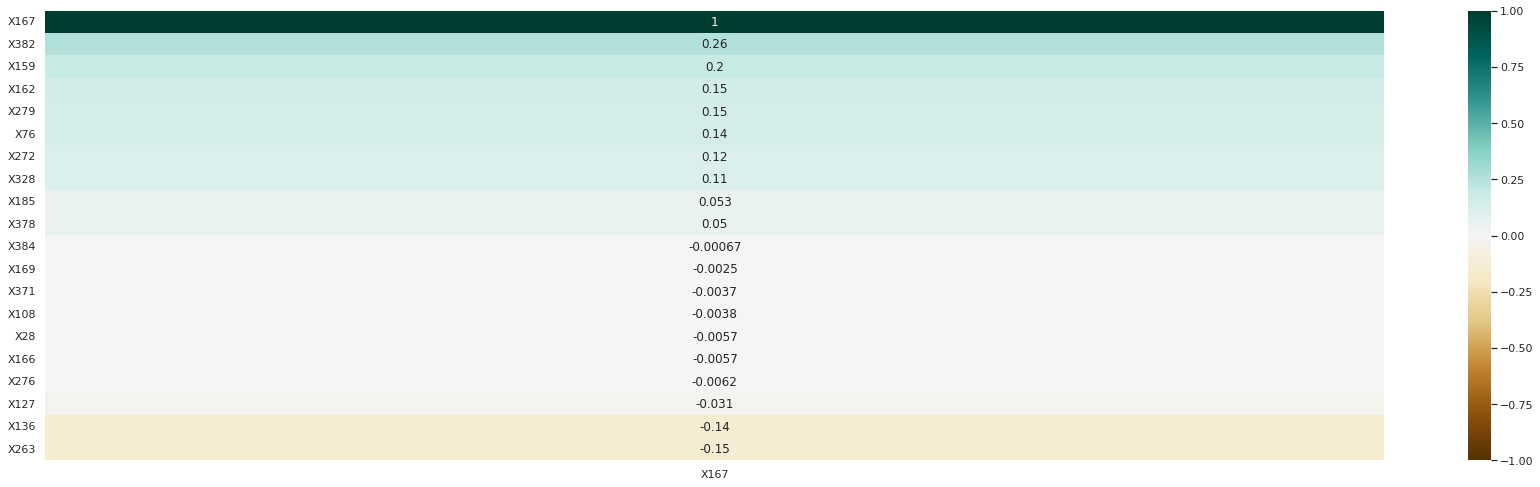

In [ ]:
heatmap = sns.heatmap(top_20_binary_feature.corr()[['X167']].sort_values(by='X167', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

feature X167 have linear realtionship between all top 20 featres so i can use X167 for modeling

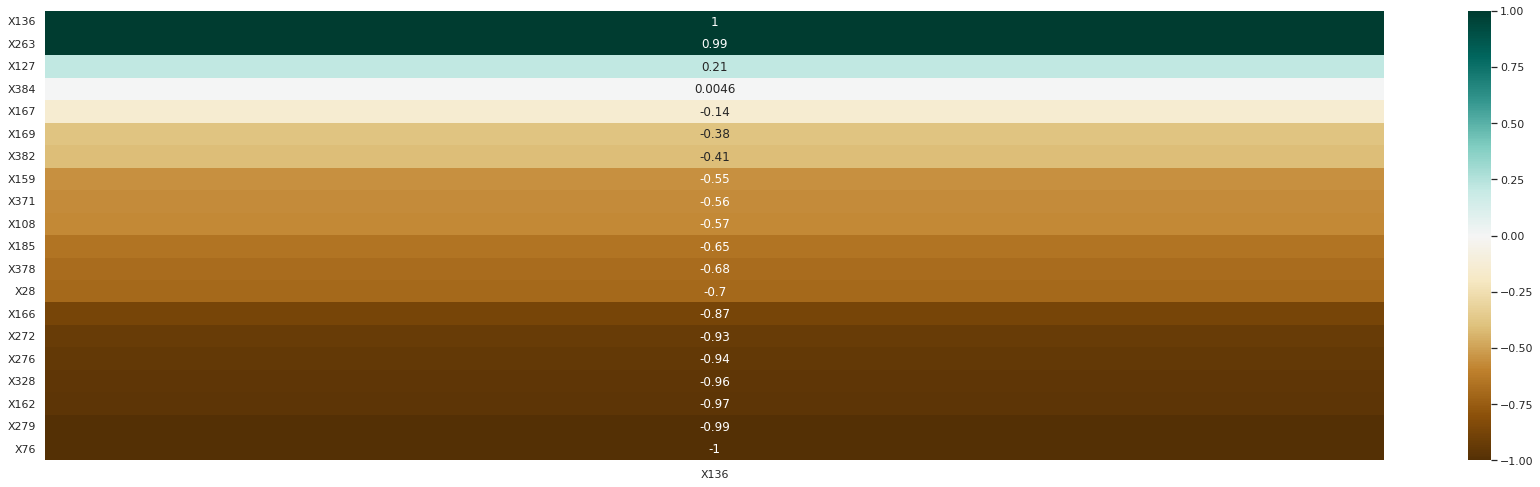

In [ ]:
heatmap = sns.heatmap(top_20_binary_feature.corr()[['X136']].sort_values(by='X136', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

X136 is negatively correlated with most of the features . i can use negatively correlated features also but i will set threshold 0.96 . 

i will use features which have corr in between -0.96 to 0.96 . i will remove features which is above or below given threshold .


first i will use all top features and then features within threshold range and then i am going to check model is improving or not

In [ ]:
highly_corr_feat=set()
corr_matrix=top_20_binary_feature.corr()

https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/

In [ ]:
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.95 and abs(corr_matrix.iloc[i, j])>= -95 :
            colname = corr_matrix.columns[i]
            highly_corr_feat.add(colname)
#######################################################################################
print("higghly corr features:" ,highly_corr_feat)
print("total ")

higghly corr features: {'X279', 'X328', 'X136', 'X162', 'X263', 'X371', 'X378'}
total 


above featuers are highly  corr which  -0.96 to 0.96 . so i am going to remove those features 

In [ ]:
top_binary_features=top_20_binary_feature.drop(highly_corr_feat , axis=1)
top_binary_features["y"]=train["y"]

In [ ]:
top_binary_features.head(5)

,X28,X76,X108,X127,X159,X166,X167,X169,X185,X272,X276,X382,X384,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,130.81
1,0,0,0,1,0,0,0,0,0,0,0,0,0,88.53
2,1,1,0,0,0,0,0,1,0,1,1,1,0,76.26
3,1,1,1,0,0,1,0,0,0,1,1,0,0,80.62
4,1,1,1,0,0,1,0,0,0,1,1,0,0,78.02


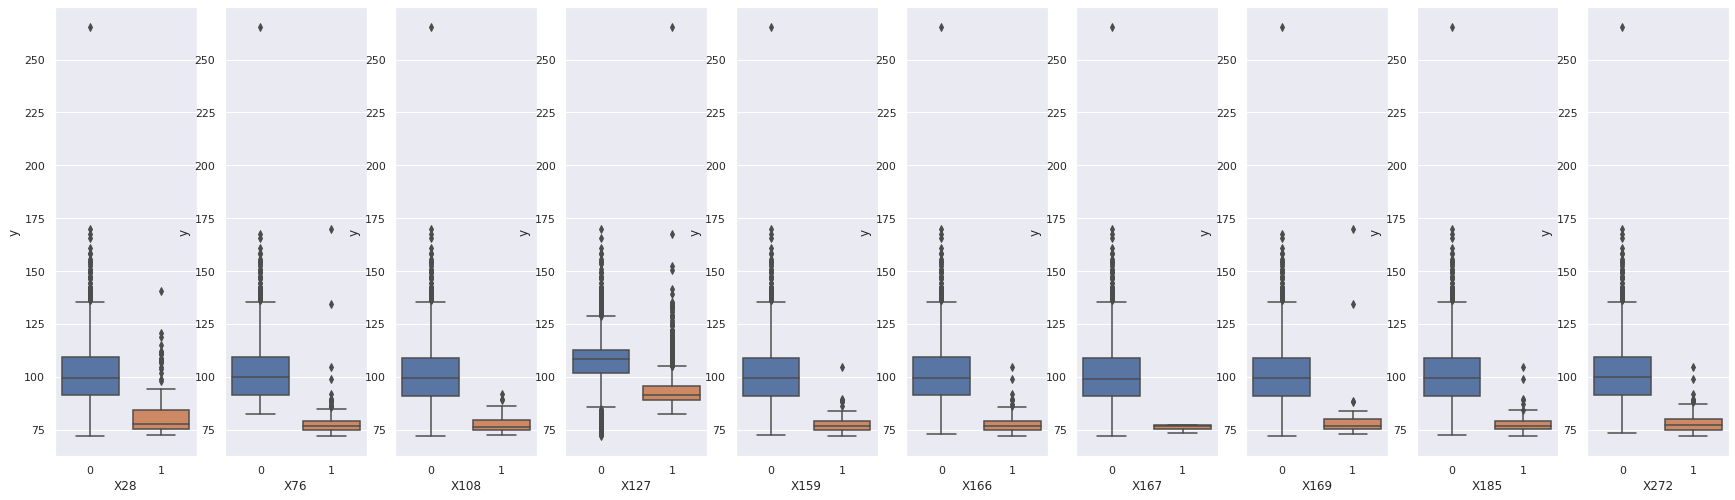

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.set(rc={'figure.figsize':(30,8.27)})
fig, axes = plt.subplots(1, 10)
plt.figure(figsize=(20,20))
for i ,j in enumerate(top_binary_features.columns[0:10]):
    ax = sns.boxplot(x=j, y="y", data=top_binary_features, orient='v',  ax=axes[i])

in above figure ivisualized  top binary features which dont have any constant  and features also have good variance 
fnally using top k features which have high variance , no constant and dupicates in data

removing highly correleated features

In [ ]:
binary_filterd_feature2.head(5)

,ID,X10,X12,X13,X14,X16,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X30,X32,X34,X36,X37,X38,X40,X41,X43,X45,X46,X47,X49,X50,X51,X52,X55,X56,X57,X59,X61,X63,X64,X65,...,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X365,X366,X367,X368,X369,X370,X371,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
highly_corr_feat=set()
corr_matrix=binary_filterd_feature2.corr()

In [ ]:
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.95:
            colname = corr_matrix.columns[i]
            highly_corr_feat.add(colname)
##################################################################
print("highly corr features:" ,highly_corr_feat)
print("Total no. of highly corr features:" ,len(highly_corr_feat))

highly corr features: {'X158', 'X61', 'X324', 'X370', 'X130', 'X129', 'X367', 'X362', 'X120', 'X311', 'X146', 'X162', 'X371', 'X337', 'X215', 'X229', 'X111', 'X194', 'X314', 'X320', 'X279', 'X250', 'X363', 'X263', 'X249', 'X328', 'X358', 'X222', 'X136', 'X368', 'X352', 'X264', 'X378', 'X348', 'X157'}
Total no. of highly corr features: 35


In [ ]:
clean_binary_features=binary_filterd_feature2.drop(highly_corr_feat , axis=1)
clean_binary_features["y"]=train["y"]

In [ ]:
clean_binary_features.head(5)

,ID,X10,X12,X13,X14,X16,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X30,X32,X34,X36,X37,X38,X40,X41,X43,X45,X46,X47,X49,X50,X51,X52,X55,X56,X57,X59,X63,X64,X65,X66,...,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X346,X349,X350,X351,X353,X354,X355,X356,X357,X359,X360,X361,X365,X366,X369,X373,X374,X375,X376,X377,X379,X380,X382,X383,X384,X385,y
0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,130.81
1,6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,88.53
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,76.26
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80.62
4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78.02


# TOP K=100 FEATURES FOR MODELING

In [ ]:
def top_k_features(data ,train , k):
  #converting data into X and Y
  X=data.drop("y" ,axis=1)
  y=data["y"]
  # selecting best ANOVA F-score features
  best_feature=SelectKBest(score_func=f_classif  , k=k)
  best_feature.fit(X , y)
  top_features=best_feature.transform(X)

  # new train  data frame which contain top ANOVA F-score features
  top_binary_features_train=train[X.columns[best_feature.get_support()]]
  top_binary_features_train["y"]=y

  # new test  data frame which contain top ANOVA F-score features
  binary_train_col=list(top_binary_features_train.columns)
  binary_train_col.remove("y")
  top_binary_features_test=test[binary_train_col]
  return top_binary_features_train ,top_binary_features_test

def cat_features(train, test ,feature):
  #onverting column namnes to list
  cat_features=list(train.select_dtypes(include='object').columns)
  train_categorical=train[cat_features]
  cat_features.remove(feature)
  # droping feature
  train_new_cat=train_categorical.drop("X4" ,axis=1)
  test_new_cat=test[cat_features]
  return train_new_cat , test_new_cat

def encoding(train , test):
  #reshaping train and test data
  X_train=np.array(train).reshape(-1, 1)
  X_test=np.array(test).reshape(-1, 1)
  #fitting train data to onehotencoding 
  enc = OneHotEncoder(handle_unknown='ignore').fit(X_train)
  #transforming train and test to encoded train and test
  encoded_train=enc.transform(X_train).toarray()
  encoded_test=enc.transform(X_test).toarray()
  return encoded_train , encoded_test  

In [ ]:
top_binary_features_train ,top_binary_features_test=top_k_features(clean_binary_features ,train , 100)

In [ ]:
train_new_cat , test_new_cat=cat_features(train, test ,"X4")

In [ ]:
display(train_new_cat.head(2) , test_new_cat.head(2))

,X0,X1,X2,X3,X5,X6,X8
0,k,v,at,a,u,j,o
1,k,t,av,e,y,l,o


,X0,X1,X2,X3,X5,X6,X8
0,az,v,n,f,t,a,w
1,t,b,ai,a,b,g,y


FINAL DF WITH CLEAN BINARY_FEATURES(TOP 100) AND CATEGORICAL_FEATURES(7)

In [ ]:
df_train = pd.concat([train_new_cat, top_binary_features_train ],axis=1 , sort=False)
df_test = pd.concat([test_new_cat,top_binary_features_test],axis=1 , sort=False)

In [ ]:
df_train.head(2)

,X0,X1,X2,X3,X5,X6,X8,X24,X26,X28,X38,X40,X43,X47,X52,X55,X57,X63,X66,X68,X69,X74,X75,X76,X78,X79,X80,X86,X98,X101,X108,X110,X114,X115,X119,X126,X127,X128,X148,X153,...,X242,X244,X245,X255,X256,X261,X265,X267,X269,X271,X272,X274,X275,X276,X277,X278,X282,X286,X287,X300,X304,X306,X307,X310,X313,X315,X318,X322,X325,X326,X345,X349,X353,X357,X366,X379,X382,X383,X384,y
0,k,v,at,a,u,j,o,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130.81
1,k,t,av,e,y,l,o,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88.53


In [ ]:
df_test.head(2)

,X0,X1,X2,X3,X5,X6,X8,X24,X26,X28,X38,X40,X43,X47,X52,X55,X57,X63,X66,X68,X69,X74,X75,X76,X78,X79,X80,X86,X98,X101,X108,X110,X114,X115,X119,X126,X127,X128,X148,X153,...,X241,X242,X244,X245,X255,X256,X261,X265,X267,X269,X271,X272,X274,X275,X276,X277,X278,X282,X286,X287,X300,X304,X306,X307,X310,X313,X315,X318,X322,X325,X326,X345,X349,X353,X357,X366,X379,X382,X383,X384
0,az,v,n,f,t,a,w,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,t,b,ai,a,b,g,y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoding features

In [ ]:
def encoding(train , test):
  #reshaping 
  X_train=np.array(train).reshape(-1, 1)
  X_test=np.array(test).reshape(-1, 1)
  enc = OneHotEncoder(handle_unknown='ignore').fit(X_train)
  encoded_train=enc.transform(X_train).toarray()
  encoded_test=enc.transform(X_test).toarray()
  return encoded_train , encoded_test

In [ ]:
encoded_X0_train ,encoded_X0_test =encoding(df_train["X0"] ,df_test["X0"])
encoded_X1_train ,encoded_X1_test =encoding(df_train["X1"] ,df_test["X1"])
encoded_X2_train ,encoded_X2_test =encoding(df_train["X2"] ,df_test["X2"])
encoded_X3_train ,encoded_X3_test =encoding(df_train["X3"] ,df_test["X3"])
encoded_X5_train ,encoded_X5_test =encoding(df_train["X5"] ,df_test["X5"])
encoded_X6_train ,encoded_X6_test =encoding(df_train["X6"] ,df_test["X6"])
encoded_X8_train ,encoded_X8_test =encoding(df_train["X8"] ,df_test["X8"])

In [ ]:
df_train_final=np.hstack((encoded_X0_train ,encoded_X1_train,encoded_X2_train ,encoded_X3_train,encoded_X5_train ,encoded_X6_train ,encoded_X8_train ,top_binary_features_train ))
df_train_final.shape

(4209, 292)

In [ ]:
df_test_final=np.hstack((encoded_X0_test ,encoded_X1_test,encoded_X2_test ,encoded_X3_test ,encoded_X5_test ,encoded_X6_test,encoded_X8_test  ,top_binary_features_test ))
df_test_final.shape

(4209, 291)

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Case_study mercedes_Manufacturing/df_test_top100.pkl','wb') as f:
  pickle.dump(df_test_final, f)

In [ ]:
with open('/content/drive/MyDrive/Case_study mercedes_Manufacturing/df_train_top100.pkl','wb') as f:
  pickle.dump(df_train_final, f)

# top 250 binary features and label encoded features

In [ ]:
top_binary_feature_train ,top_binary_features_test=top_k_features(clean_binary_features,train ,250)
train_new_cat , test_new_cat=cat_features(train, test ,"X4")
top_binary_feature_train.shape

(4209, 251)

In [ ]:
cat_list=list(train_new_cat.columns)

In [ ]:
cat_list.extend(top_binary_feature_train.columns)

In [ ]:
len(cat_list)

258

In [ ]:
import pickle
with open('/content/drive/MyDrive/Case_study mercedes_Manufacturing/data/final_label.pkl', 'wb') as f:
  pickle.dump(cat_list, f)

In [ ]:
df_train = pd.concat([train_new_cat, top_binary_feature_train],axis=1 , sort=False)
df_test = pd.concat([test_new_cat,top_binary_features_test],axis=1 , sort=False)

In [ ]:
df_train.shape , df_test.shape

((4209, 258), (4209, 257))

In [ ]:
df_train.head(2)

,X0,X1,X2,X3,X5,X6,X8,ID,X10,X12,X13,X14,X16,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X30,X32,X34,X36,X37,X38,X40,X41,X43,X45,X46,X47,X49,X50,X51,X52,X55,...,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X346,X349,X350,X351,X353,X354,X355,X356,X357,X359,X360,X361,X365,X366,X369,X373,X374,X375,X376,X377,X379,X380,X382,X383,X384,X385,y
0,k,v,at,a,u,j,o,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,130.81
1,k,t,av,e,y,l,o,6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,88.53


In [ ]:
from sklearn import preprocessing

In [ ]:
def label_encodes_binary(df_train , df_test , feature):
  #fitting train categrical feature to label encoded
  le = preprocessing.LabelEncoder()
  le.fit(df_train[feature])
  #transforming feature
  le.transform(df_train[feature])
  #zipping categories and indexing them 
  le_dict = dict(zip(le.classes_, le.transform(le.classes_)))

  labelenc_train=[]
  labelenc_test=[]
  # now we are ignoring categories which are present in test categorical feature
  # and storing final numerical categories to list
  for i in df_train[feature]:
    if i in le_dict:labelenc_train.append(le_dict[i])

  for j in df_test[feature]:
    if j in le_dict:labelenc_test.append(le_dict[j])
    else: labelenc_test.append(-1)   

  return  labelenc_train ,   labelenc_test , le_dict

In [ ]:
cd /content/drive/MyDrive/Case_study mercedes_Manufacturing/deployment/encoded

/content/drive/MyDrive/Case_study mercedes_Manufacturing/deployment/encoded


In [ ]:
df_train["X0"]  , df_test["X0"] , le_dict_X0 = label_encodes_binary(df_train , df_test , "X0")
df_train["X1"]  , df_test["X1"] , le_dict_X1 = label_encodes_binary(df_train , df_test , "X1")
df_train["X2"]  , df_test["X2"]  ,le_dict_X2= label_encodes_binary(df_train , df_test , "X2")
df_train["X3"]  , df_test["X3"]  ,le_dict_X3= label_encodes_binary(df_train , df_test , "X3")
df_train["X5"]  , df_test["X5"]  ,le_dict_X5= label_encodes_binary(df_train , df_test , "X5")
df_train["X6"]  , df_test["X6"]  ,le_dict_X6= label_encodes_binary(df_train , df_test , "X6")
df_train["X8"]  , df_test["X8"]  ,le_dict_X8= label_encodes_binary(df_train , df_test , "X8")

In [ ]:
mkdir encoded

In [ ]:
with open("le_dict_X0.pickle", 'wb') as f:
  pickle.dump(le_dict_X0 ,f)

with open("le_dict_X1.pickle", 'wb') as f:
  pickle.dump(le_dict_X1 ,f)

with open("le_dict_X2.pickle", 'wb') as f:
  pickle.dump(le_dict_X2 ,f)

with open("le_dict_X3.pickle", 'wb') as f:
  pickle.dump(le_dict_X3 ,f)

with open("le_dict_X5.pickle", 'wb') as f:
  pickle.dump(le_dict_X5 ,f)

with open("le_dict_X6.pickle", 'wb') as f:
  pickle.dump(le_dict_X6 ,f)  

with open("le_dict_X8.pickle", 'wb') as f:
  pickle.dump(le_dict_X8 ,f)        

In [ ]:
with open('le_dict_X1.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
df_train.head(5)

,X0,X1,X2,X3,X5,X6,X8,ID,X10,X12,X13,X14,X16,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X30,X32,X34,X36,X37,X38,X40,X41,X43,X45,X46,X47,X49,X50,X51,X52,X55,...,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X346,X349,X350,X351,X353,X354,X355,X356,X357,X359,X360,X361,X365,X366,X369,X373,X374,X375,X376,X377,X379,X380,X382,X383,X384,X385,y
0,32,23,17,0,24,9,14,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,130.81
1,32,21,19,4,28,11,14,6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,88.53
2,20,24,34,2,27,9,23,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,76.26
3,20,21,34,5,27,11,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80.62
4,20,23,34,5,12,3,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78.02


In [ ]:
df_test.head(5)

,X0,X1,X2,X3,X5,X6,X8,ID,X10,X12,X13,X14,X16,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X30,X32,X34,X36,X37,X38,X40,X41,X43,X45,X46,X47,X49,X50,X51,X52,X55,...,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X346,X349,X350,X351,X353,X354,X355,X356,X357,X359,X360,X361,X365,X366,X369,X373,X374,X375,X376,X377,X379,X380,X382,X383,X384,X385
0,20,23,34,5,-1,0,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40,3,7,0,-1,6,24,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,20,23,16,5,-1,9,9,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20,13,34,5,-1,11,13,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,43,20,16,2,28,8,12,5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
train_ID=df_train.pop('ID')
test_ID =df_test.pop('ID')
df_train.insert(0, 'ID', train_ID)
df_test.insert(0, 'ID',test_ID )

In [ ]:
df_train.head(2)

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X16,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X30,X32,X34,X36,X37,X38,X40,X41,X43,X45,X46,X47,X49,X50,X51,X52,X55,...,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X346,X349,X350,X351,X353,X354,X355,X356,X357,X359,X360,X361,X365,X366,X369,X373,X374,X375,X376,X377,X379,X380,X382,X383,X384,X385,y
0,0,32,23,17,0,24,9,14,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,130.81
1,6,32,21,19,4,28,11,14,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,88.53


In [ ]:
df_test.head(2)

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X16,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X30,X32,X34,X36,X37,X38,X40,X41,X43,X45,X46,X47,X49,X50,X51,X52,X55,...,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X346,X349,X350,X351,X353,X354,X355,X356,X357,X359,X360,X361,X365,X366,X369,X373,X374,X375,X376,X377,X379,X380,X382,X383,X384,X385
0,1,20,23,34,5,-1,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,40,3,7,0,-1,6,24,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
with open('/content/drive/MyDrive/Case_study mercedes_Manufacturing/df_test_250+labelenc.pkl','wb') as f:
  pickle.dump(df_test, f)

In [ ]:
with open('/content/drive/MyDrive/Case_study mercedes_Manufacturing/df_train_250+labelenc.pkl','wb') as f:
  pickle.dump(df_train, f)